In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [12]:
t = 0.3

k = 20
t_stim = 0.1
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [13]:
N = 20
w_in = 0.6e-9
w_sigma = w_in / 10

bias = 100e-6
bias_sigma = bias / 10 

f = 50
a = 12e-3

r_e = 0
r_i = 0
ns_e, ts_e, vs = neurons.lif(t, N, k, ns, ts, w_in, w_sigma, bias, bias_sigma, f, a=a, time_step=dt, r_e=r_e, r_i=r_i)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


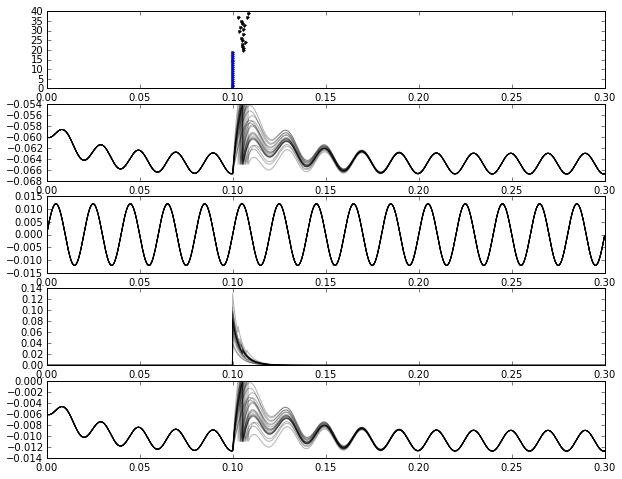

In [19]:
plt.figure(figsize=(10, 8))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
    
plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(0.0, color='k', alpha=0.5)

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3); 
plt.axhline(0.0, color='k', alpha=0.5)

In [15]:
# Now readout the 'E' response, in another LIF 

In [16]:
N = 100
w_in = 1e-9
w_sigma = 0

bias = 100e-6
bias_sigma = 0

f = 0 # 50
a = 0

ns_out, ts_out, vs_out = neurons.lif(
    t, N, k, 
    ns_e, ts_e, 
    w_in, w_sigma, 
    bias, bias_sigma, 
    f, a=a, 
    time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


(0.09, 0.15)

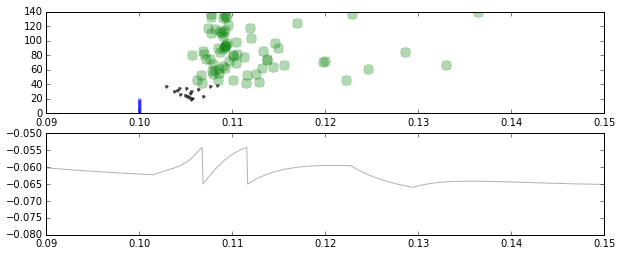

In [17]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(ts, ns, '.b', alpha=0.3)
plt.plot(ts_e, ns_e + k, '.k', alpha=0.7)
plt.plot(ts_out, ns_out + k + k + 1, '.g', alpha=0.3, markersize=20)
plt.xlim(0.09, .15)

plt.subplot(212)
for j in range(1):
    plt.plot(times, vs_out['vm'][j, :], 'k', alpha=0.3);
plt.xlim(0.09, .15)